# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

---

---
# Laptop is too slow, so using Google Colab, need to mount drive to access data file

---
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import Image, HTML
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.compose import ColumnTransformer


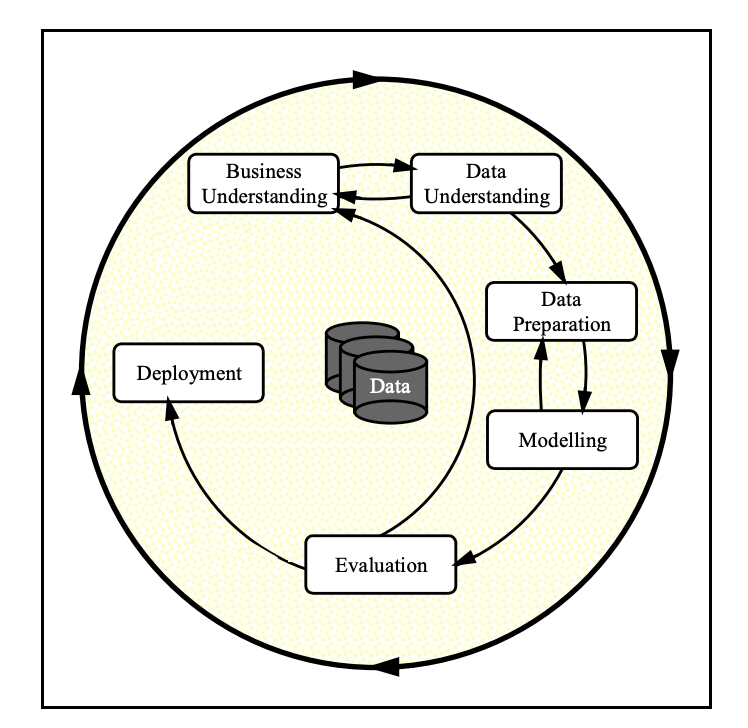

In [ ]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Berkeley_Professional_Certificate_ML_AI/Module_11/practical_application_II_starter/images/crisp.png',width=500,height=500)

### CRISP-DM Framework


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.



---



---


# **Business problem**
## Understand why some used cars sell at a higer price, compared to others.   

There are many factors like age, manufacturer, model, condition, odometer reading, fuel type, transmission, and drive that influence a used car buyer's decision to buy a car at a particular asking price. We need to find a way to identify the most important factors and their weightages that drive used car pricing so that the dealership can better price the car for quick sell.

## Objective of this project
Identify the most important factors that detrmine used car prices so the dealership can better price their vehicles and understand consumer preferences.


---


---




### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


---

---

# **Data exploration**


### Look for:
1. Duplicate rows
2. Get Null count per column
3. Inspect categrical values
4. Look for outliers


---

---



In [ ]:
vehicles = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Berkeley_Professional_Certificate_ML_AI/Module_11/practical_application_II_starter/data/vehicles.csv')

In [ ]:
vehicles.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
183630,7304149301,baltimore,0,2013.0,lexus,is,NaN,NaN,gas,101466.0,clean,automatic,JTHBF5C22D5188335,fwd,sub-compact,sedan,NaN,md
339209,7303801518,reading,11000,1987.0,chevrolet,corvette,NaN,NaN,gas,42000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,pa
36227,7311106002,merced,32998,2018.0,audi,q5,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,SUV,NaN,ca
145019,7309306804,rockford,15990,2017.0,chevrolet,equinox lt awd,excellent,4 cylinders,gas,55715.0,clean,automatic,2GNALCEK2H1525088,4wd,mid-size,SUV,black,il
99488,7311390734,jacksonville,5495,2013.0,ford,fusion se,good,NaN,gas,130000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl


In [ ]:
vehicles.dtypes.to_frame().T

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,int64,object,int64,float64,object,object,object,object,object,float64,object,object,object,object,object,object,object,object


In [ ]:
vehicles.shape

(426880, 18)

In [ ]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
# Loop through all categorical columns and print their unique values
exclude_cols = ['VIN', 'id', 'region', 'price', 'year', 'odometer', 'state']

for col in vehicles.select_dtypes(include=['object', 'category']).columns:
    if col not in exclude_cols:
        print(f"\nColumn: {col}")
        print(vehicles[col].unique())



Column: manufacturer
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']

Column: model
[nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']

Column: condition
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']

Column: cylinders
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']

Column: fuel
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']

Column: title_status
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']

Column: transmission
[nan 'other' 'automatic' 'manual']

Column: drive
[nan 'rw

In [ ]:
null_summary = pd.DataFrame({
    "null_count": vehicles.isnull().sum(),
    "percent_null": (vehicles.isnull().sum() / vehicles.shape[0]) * 100
}).sort_values("percent_null", ascending=False)
null_summary.T

,size,cylinders,condition,VIN,drive,paint_color,type,manufacturer,title_status,model,odometer,fuel,transmission,year,region,id,price,state
null_count,306361.000000,177678.00000,174104.000000,161042.000000,130567.000000,130203.000000,92858.000000,17646.000000,8242.000000,5277.000000,4400.000000,3013.000000,2556.000000,1205.000000,0.0,0.0,0.0,0.0
percent_null,71.767476,41.62247,40.785232,37.725356,30.586347,30.501078,21.752717,4.133714,1.930753,1.236179,1.030735,0.705819,0.598763,0.282281,0.0,0.0,0.0,0.0


In [ ]:
vehicles[ (vehicles['year'] < 1950) | (vehicles['year'] > 2025) ].sort_values('year', ascending=True)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
398032,7316151460,roanoke,500,1900.0,dodge,rampage,salvage,NaN,gas,999999.0,clean,other,NaN,fwd,NaN,other,NaN,va
154138,7304826988,muncie / anderson,75,1900.0,NaN,any and all,NaN,NaN,other,10000.0,clean,other,NaN,NaN,NaN,NaN,NaN,in
95914,7308164081,ft myers / SW florida,1,1900.0,ford,power wagon,NaN,NaN,gas,2300.0,clean,other,NaN,NaN,NaN,NaN,NaN,fl
96564,7304599769,ft myers / SW florida,1,1900.0,ford,power wagon,NaN,NaN,gas,2300.0,clean,other,NaN,NaN,NaN,NaN,NaN,fl
94319,7315229277,ft myers / SW florida,1,1900.0,ford,power wagon,NaN,NaN,gas,2300.0,clean,other,NaN,NaN,NaN,NaN,NaN,fl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307122,7306915015,oklahoma city,32999,1949.0,NaN,Packard Touring Sedan 2392,NaN,NaN,other,87298.0,clean,manual,00000002392C10100,NaN,NaN,NaN,NaN,ok
314181,7312917220,corvallis/albany,16500,1949.0,ford,f4,excellent,8 cylinders,gas,27137.0,clean,manual,NaN,rwd,full-size,pickup,red,or
43006,7314408711,orange county,15888,1949.0,NaN,crosley,excellent,NaN,gas,56000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,ca
320536,7304690995,medford-ashland,2500,1949.0,NaN,olds coupe,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,or


In [ ]:
vehicles[ (vehicles['odometer'] < 0) | (vehicles['odometer'] > 500000) ]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al
455,7314165149,birmingham,22500,1929.0,ford,NaN,NaN,NaN,gas,9999999.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
562,7313478091,birmingham,27990,2014.0,ram,2500 4x4,like new,6 cylinders,diesel,2222222.0,clean,automatic,NaN,4wd,full-size,truck,white,al
615,7312878239,birmingham,0,2014.0,ram,2500 slt 4x4,like new,6 cylinders,diesel,1111111.0,clean,automatic,NaN,4wd,full-size,truck,white,al
616,7312876423,birmingham,17990,2018.0,ford,edge sel,like new,6 cylinders,gas,1111111.0,clean,automatic,NaN,fwd,mid-size,SUV,blue,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423872,7311490756,milwaukee,79000,2015.0,NaN,peterbilt 389,good,NaN,diesel,616239.0,clean,manual,1XPXD49X6FD277682,NaN,NaN,NaN,purple,wi
424165,7310638598,milwaukee,19500,2010.0,NaN,freightliner cascadia sleeper,NaN,NaN,diesel,900132.0,clean,manual,NaN,NaN,NaN,NaN,white,wi
424840,7307789230,milwaukee,98000,2013.0,NaN,2013 Peterbilt Cottrell trailer,good,NaN,diesel,550000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,wi
426106,7305894766,wausau,850,1987.0,ram,NaN,salvage,NaN,gas,9999999.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wi


In [ ]:
odd_price_rows = vehicles[ (vehicles['price'] < 100) | (vehicles['price'] > 200000) ]
print(f"Percentage of rows with odd prices: {len(odd_price_rows) / vehicles.shape[0] * 100:.2f}%")

Percentage of rows with odd prices: 8.51%


---

---

# **Data exploration results**

1. Did basic inspection of data - head(), dtypes, shape, describe()

2. Calculated missing counts percentages with isnull().sum() and identified columns that can be dropped because high % of data is missing. **size** qualifies as **70%** of size is missing.

3. VIN does not contribute much to the buying decision and 37% of VIN is missing. Good candidate to be dropped.

4. Decided that 'year' (more like age), 'odometer' readings are critical to buying decision. Only 0.28% of rows with 'year' are null and 1.03% of 'odometer' are null. These are small numbers and dropping these rows will ensure that all remaining rows have these values critical for the model to predict future price.

5. Looked for data outliers.   

   a) Cars older than 1950. Many of these cars have **placeholder price of $1.**.

   b) many have fake odometer readings (1, 10, 100 etc)     
   a)and b) together is **1213 rows only**, so decided to drop them.    

   c) There were **1386 rows** with odometer reading of 500K miles or more. Decided to drop them as they can skew the data.  

   d) Incorect pricing - Less than 100 and more than $200K. These were about 8.5% of the rows. Since these also can distort the model performance, decided to drop them.




---

---



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

---

---

# **Data cleaning execution**

1. **Data imputation** - All nulls in non numeric features are replaced with 'unknown'

2. **Drop Features (columns):**

   A. **id** - as this add no value to the car value.

   B. **size** - though size matters to a car value, **70%** of the data is missing.  

   C. **region and model** - Each contains too many elements, very difficult to convert to 'one hot encoding'.   

   D. **VIN** - adds no value to car value.  

   E. **state** - Though state is important (cars that sell in Texas more many be different from what sells in California) however with 'one hot encoding' it will explode the columns, so dropping it for how.

3. Drop Observations (rows):

   A.  **Year, Odometer** - These are critical and influences the price of used car, and the null rows are very few (Year - 0.28% and Odometer 1.03%). Dropping them will ensure that this data is avaliable in all remaining rows and help the performance of the models.  

   B. **Outliers** -
   
      i) Drop any vehicle older than 1950 and younger than 2025   

      ii) Odometer readings in negative or greater than 500K.

      iii) Price less than 100 or more than 200K

4. **Feature Engineering** -

   A. **Ordinal Encoding** -

     i) **Condition** has meaning- Encoded "salvage": 0, "fair": 1, "good": 2, "excellent": 3, "like new": 4, "new": 5, "unknown": -1

     ii) **title_status** has a clear hierarchy : "parts only": 0, "salvage": 1, "rebuilt": 2, "lien": 3, "unknown": 3, "missing": 3, "clean": 4. (gave same weightage to lien, unkown, missing )

   B. **One-hot encoding**
     
     fuel, transmission, drive, paint_color, type, manufacturer.


   C. **Feature creation**
     i) Created a column called **car_age**. Everyone wants to know how old is the car and the age is important to the buying decision.  

     Drop **year**, no more needed

   D **Scaling** Normalized numerical Features odometer, car_age.

(Note: I did not do PCA because I will be doing Ridge and LASSO. Ridge handles multicollinearity (features highly corelated to each other) by shrinking correlated coefficients. LASSO adds both shrinkage and feature selection. PCA removes collinearity but basically redundant in this scenario, it is also hard to interpret the data.)

---

---



In [ ]:
for col in vehicles.select_dtypes(include='object').columns:
    vehicles[col] = vehicles[col].fillna('unknown')

In [ ]:
null_summary = pd.DataFrame({
    "null_count": vehicles.isnull().sum(),
    "percent_null": (vehicles.isnull().sum() / vehicles.shape[0]) * 100
}).sort_values("percent_null", ascending=False)
null_summary.T

,odometer,year,region,id,manufacturer,price,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
null_count,4400.000000,1205.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent_null,1.030735,0.282281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop Features

In [ ]:
vehicles = vehicles.drop(['id', 'model', 'region', 'size', 'VIN', 'state'], axis=1)

Drop Observations

In [ ]:
vehicles = vehicles.dropna(subset=[ "year", "odometer"])

Drop Outliers

In [ ]:
vehicles = vehicles[ (vehicles['year'] >= 1950) & (vehicles['year'] <= 2025) ]

In [ ]:
vehicles = vehicles[ (vehicles['odometer'] >= 0) & (vehicles['odometer'] <= 500000) ]

In [ ]:
vehicles = vehicles[ (vehicles['price'] >= 100) & (vehicles['price'] <= 200000) ]

In [ ]:
vehicles.shape

(418808, 12)

Feature engineering

In [ ]:
vehicles['car_age'] = 2025 - vehicles['year']

In [ ]:
vehicles.drop('year', axis=1, inplace=True)

In [ ]:
#Check data quality
null_summary = pd.DataFrame({
    "null_count": vehicles.isnull().sum(),
    "percent_null": (vehicles.isnull().sum() / vehicles.shape[0]) * 100
}).sort_values("percent_null", ascending=False)
null_summary.T

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,car_age
null_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent_null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


"Condition" has meaning- I will do ordinal encoding
"salvage": 0, "fair": 1, "good": 2, "excellent": 3, "like new": 4, "new": 5, "unknown": -1

In [ ]:
condition_order = {
    "salvage": 0, "fair": 1, "good": 2, "excellent": 3, "like new": 4, "new": 5,
     "unknown": -1
}
vehicles['condition'] = vehicles['condition'].map(condition_order)

title_status has clear hierarchy so can be ordianally encoded

In [ ]:
#vehicles['title_status'] = vehicles['title_status'].fillna('unknown')

title_order = {
    "parts only": 0,
    "salvage": 1,
    "rebuilt": 2,
    "lien": 3,
    "unknown": 3,
    "missing": 3,
    "clean": 4
}

vehicles["title_status"] = vehicles["title_status"].map(title_order)



One-hot encode: fuel, transmission, drive, paint_color, type, manufacturer.

In [ ]:
# Select only object columns for one-hot encoding ( 'condition' has already been encoded)
categorical_cols = vehicles.select_dtypes(include='object').columns.tolist()

vehicles = pd.get_dummies(vehicles,
                          columns=categorical_cols,
                          drop_first=True)

Scaling Numerical Features

Standardize odometer, car_age, year.

In [ ]:
scaler = StandardScaler()
vehicles[['odometer','car_age']] = scaler.fit_transform(vehicles[['odometer','car_age']])

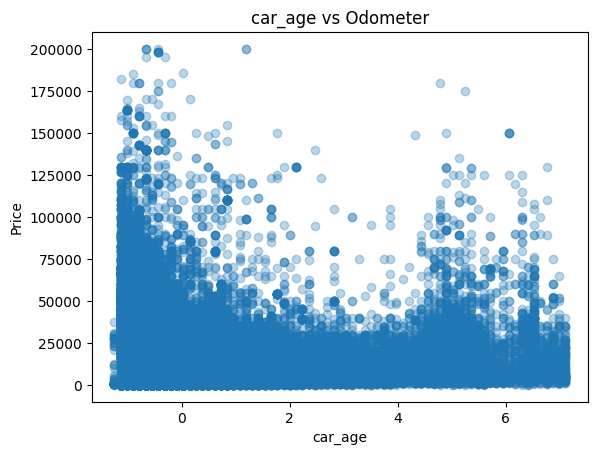

In [ ]:
plt.scatter(vehicles['car_age'], vehicles['price'], alpha=0.3)
plt.xlabel("car_age")
plt.ylabel("Price")
plt.title("car_age vs Odometer")
plt.show()

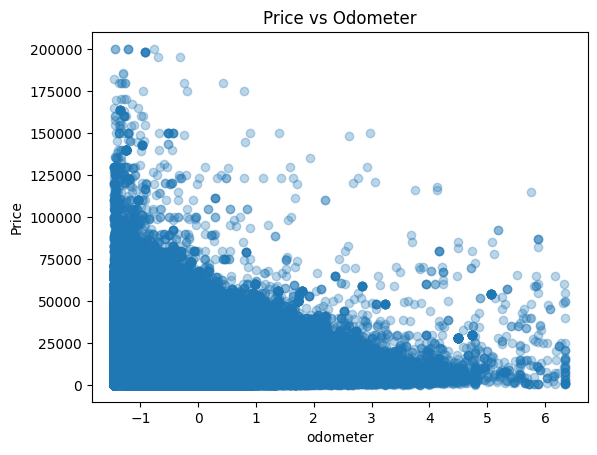

In [ ]:
plt.scatter(vehicles['odometer'], vehicles['price'], alpha=0.3)
plt.xlabel("odometer")
plt.ylabel("Price")
plt.title("Price vs Odometer")
plt.show()

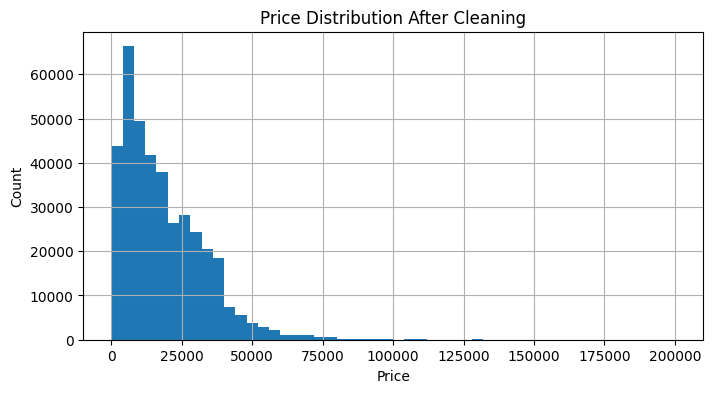

In [ ]:
vehicles['price'].hist(bins=50, figsize=(8,4))
plt.title("Price Distribution After Cleaning")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


---

---

# **Final Check**

Histogram has a right scewed shape - as price increases count decreases

Main cluster around **5k - 20k**

Long tail for exortic cars

Data processing looks good. Ready to create model

---

---



In [ ]:
#final check of data
vehicles.sample(5)

,price,condition,odometer,title_status,car_age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
147167,25950,-1,-0.629081,4,-0.780265,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281278,14995,3,-0.489389,4,-0.548486,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
390861,6865,-1,0.454606,4,-0.084927,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
264076,9997,3,0.441514,4,-0.084927,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
128561,4300,3,-0.372433,4,0.610411,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
vehicles.columns

Index(['price', 'condition', 'odometer', 'title_status', 'car_age',
       'manufacturer_alfa-romeo', 'manufacturer_aston-martin',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac',
       'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover',
       'manufac

In [ ]:
#make a backup copy for later use
vehicles_original = vehicles.copy(deep=True)
vehicles_original.head()

,price,condition,odometer,title_status,car_age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
27,33590,2,-0.545284,4,-0.316706,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
28,22590,2,-0.337651,4,0.146852,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,39590,2,-1.150162,4,-1.012045,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
30,30990,2,-0.807425,4,-0.664376,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
31,15000,3,0.548233,4,-0.200817,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

---

---

# **Modeling Plan**

**Objective:**
We want to understand what drives used car prices and build a model that can reasonably predict them.

1. I will start with a baseline **Linear Regression** model and establish a benchmark of MAE (Mean Squared Error, RMSE (Root Mean Squared Error) and R^2 (Coeff of Determination, If 1 then perfect fit, If 0= Model did not understand anything :-) , a -ve value will be worse than baseline)

2. I will do **Polynomial & Interaction** Features to expand the datset and capture non linear effects.

3. I will do Regularization: with **Ridge** (adds penalty to shrink coefficients) & **Lasso** (can reduce some coeffs to 0 there by removing features - feature selection) this is the way Lasso will reduce complexity of the model.

4. Next I wil create a pipeline and combine Ridge and Lasso to see if the model performance improves.  

5. After that I will do Sequential Feature Selector to reduce feature sets further.


---

---



Define the traget and features set

In [ ]:
X = vehicles.drop('price', axis=1)
y = vehicles['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Baseline LinerRegression Model**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Training R^2:", lin_reg.score(X_train, y_train))
print("Test R^2:", lin_reg.score(X_test, y_test))

Training R^2: 0.5586396657897836
Test R^2: 0.5551701808452119


In [ ]:
# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [ ]:

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))


test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training MAE:  $", round(train_mae,2))
print("Training RMSE: $", round(train_rmse,2))
print("Test MAE:      $", round(test_mae,2))
print("Test RMSE:     $", round(test_rmse,2))


Training MAE:  $ 6449.67
Training RMSE: $ 9939.8
Test MAE:      $ 6480.52
Test RMSE:     $ 10011.37


In [ ]:
# Coefficients
coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lin_reg.coef_
})


coeffs["AbsCoef"] = coeffs["Coefficient"].abs()
coeffs = coeffs.sort_values(by="AbsCoef", ascending=False).drop("AbsCoef", axis=1)

print(coeffs.head(20))


                         Feature   Coefficient
14          manufacturer_ferrari  72030.079091
5      manufacturer_aston-martin  28354.373704
54                 fuel_electric -18064.881489
41            manufacturer_tesla  15601.857003
56                   fuel_hybrid -15366.279967
55                      fuel_gas -15198.635174
58                  fuel_unknown -14370.203117
18  manufacturer_harley-davidson -13029.399727
47         cylinders_3 cylinders -12866.362634
57                    fuel_other -12504.839798
36          manufacturer_porsche  11008.531852
48         cylinders_4 cylinders -10899.634742
49         cylinders_5 cylinders -10823.743546
15             manufacturer_fiat  -9621.107970
46        cylinders_12 cylinders   9357.210895
52               cylinders_other  -9054.105952
12           manufacturer_datsun   8754.867135
32       manufacturer_mitsubishi  -8271.641987
50         cylinders_6 cylinders  -8048.143101
53             cylinders_unknown  -7458.274771




---



---


#Findings:

R^2 test = 55.5% so, our model explains about 55.5% (half) of the variation in used car prices based on the features we have. this can be used as a baseline.

**Performance**

MAE (approx $6,400) - Model's average price is off by 6.4k

RMSE (approx $69,900) - Model's typical error size is 9.9k . So some errors may be even bigger. Maybe luxury cars are skewing the data.  

MAE and RMSE for train and test are close, so he model is stable

It captures broad trends but has big errors in dollar terms.

Business takeaway: the model is useful for some directional pricing info (e.g., higher mileage lowers price), but not accurate enough to set final retail prices without adjustment.


---



---



manufacturer_ferrari +71,990 → being a Ferrari bumps the predicted price up by ~72k. !!!

+15601 → Tesla cars hold value

fuel_electric and hybrid lose value.

Fuel gas also loses value , hard to understand but could be that deisel was baseline and gas cars are cheaper than diesel cars.


---



---




**Ridge Regression Model**

---



---



Objective is to do regularization, control large coefficients that can destabilize the model. It helps with overfitting (learnng too much)

Now pick the best penalty - alpha

In [ ]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="neg_mean_absolute_error")
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
print("Best Ridge alpha:", ridge_grid.best_params_)

Best Ridge alpha: {'alpha': 1}


In [ ]:
y_test_pred = best_ridge.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Test R^2:", best_ridge.score(X_test, y_test))
print("Test MAE:      $", round(test_mae,2))
print("Test RMSE:     $", round(test_rmse,2))


Test R^2: 0.5552030883247295
Test MAE:      $ 6480.54
Test RMSE:     $ 10011.0


In [ ]:
coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_ridge.coef_
})


coeffs["AbsCoef"] = coeffs["Coefficient"].abs()
coeffs = coeffs.sort_values(by="AbsCoef", ascending=False).drop("AbsCoef", axis=1)

print(coeffs.head(20))

                         Feature   Coefficient
14          manufacturer_ferrari  70603.400186
5      manufacturer_aston-martin  26831.048349
54                 fuel_electric -18024.255168
41            manufacturer_tesla  15540.603547
56                   fuel_hybrid -15356.175390
55                      fuel_gas -15193.437508
58                  fuel_unknown -14357.035386
18  manufacturer_harley-davidson -12920.006463
47         cylinders_3 cylinders -12778.387522
57                    fuel_other -12497.774668
36          manufacturer_porsche  10987.655570
48         cylinders_4 cylinders -10837.928359
49         cylinders_5 cylinders -10753.164839
15             manufacturer_fiat  -9615.580527
46        cylinders_12 cylinders   9460.756411
52               cylinders_other  -8984.414043
12           manufacturer_datsun   8578.309351
32       manufacturer_mitsubishi  -8278.149313
50         cylinders_6 cylinders  -7986.322884
53             cylinders_unknown  -7396.618206




---



---


#Findings:

Alpha=1

No change in R^2, MAE and RMSE are nearly identical

---



---



---



---
**LASSO Regression Model**


Objective is to do L1 regularization, control large coefficients that can destabilize the model. Lasso can zero-out weak features, reduce feature set.

after this we can try

Feature selection (Sequential Feature Selector) to reduce dimensionality and see if performance improves.



---



---



In [ ]:
#Taking too long to complete. Will change parameters
#lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
#lasso_grid = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5, scoring="neg_mean_absolute_error")
#lasso_grid.fit(X_train, y_train)

#best_lasso = lasso_grid.best_estimator_
#print("Best LASSO alpha:", lasso_grid.best_params_)


In [ ]:
lasso_params = {'alpha': [0.1, 1, 10]}
lasso_grid = GridSearchCV(
    Lasso(max_iter=2000),
    lasso_params,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1  # use all CPUs
)
lasso_grid.fit(X_train, y_train)

best_lasso = lasso_grid.best_estimator_
print("Best LASSO alpha:", lasso_grid.best_params_)

Best LASSO alpha: {'alpha': 1}


In [ ]:
y_test_pred = best_lasso.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Test R^2:", best_lasso.score(X_test, y_test))
print("Test MAE:      $", round(test_mae,2))
print("Test RMSE:     $", round(test_rmse,2))


Test R^2: 0.555058148660508
Test MAE:      $ 6479.7
Test RMSE:     $ 10012.63


In [ ]:
# Get coefficients from best LASSO model
lasso_coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_lasso.coef_
})

# Separate kept vs eliminated
kept = lasso_coeffs[lasso_coeffs["Coefficient"] != 0]
eliminated = lasso_coeffs[lasso_coeffs["Coefficient"] == 0]

print("Features kept by LASSO:", kept.shape[0])
print("Features eliminated by LASSO:", eliminated.shape[0])

# Look at top 20 strongest features
kept = kept.reindex(kept.Coefficient.abs().sort_values(ascending=False).index)
print(kept.head(20))


Features kept by LASSO: 84
Features eliminated by LASSO: 6
                         Feature   Coefficient
14          manufacturer_ferrari  66261.035722
54                 fuel_electric -17355.167922
56                   fuel_hybrid -15156.207745
55                      fuel_gas -15091.552927
41            manufacturer_tesla  14958.969740
58                  fuel_unknown -14089.711795
57                    fuel_other -12356.007128
5      manufacturer_aston-martin  12153.207195
36          manufacturer_porsche  11077.879646
46        cylinders_12 cylinders  10369.141428
47         cylinders_3 cylinders -10128.916362
18  manufacturer_harley-davidson  -9784.089459
48         cylinders_4 cylinders  -8776.719357
15             manufacturer_fiat  -8760.737420
49         cylinders_5 cylinders  -8392.302282
32       manufacturer_mitsubishi  -7804.585018
52               cylinders_other  -6624.496136
1                       odometer  -6380.339708
50         cylinders_6 cylinders  -5895.951308
6

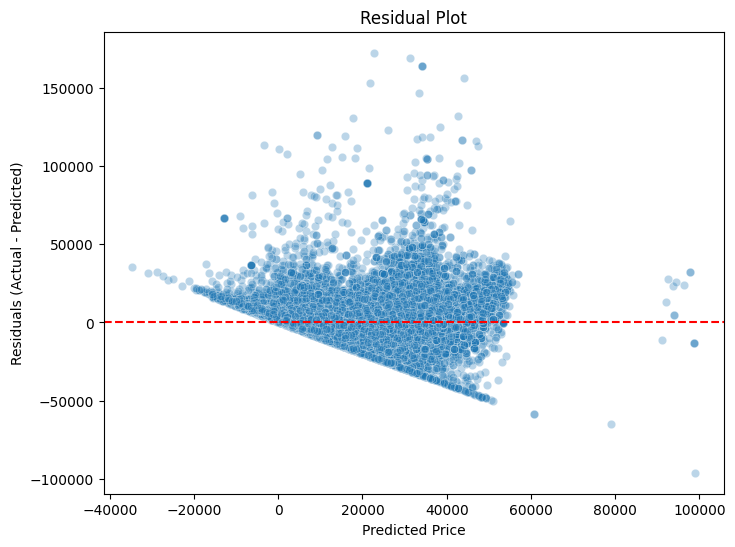

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred, y=y_test - y_test_pred, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()




---



---



Residuals (errors) should be scattered randomly around 0.

Triangle/Funnel shape → residual spread gets wider as predicted price increases.
SO errors aren’t constant across price levels. Means the model predicts cheaper cars more consistently, but does not do well with expensive ones.

Clustering below 0 at higher predictions ndicating that the model  underestimates high-priced cars.


---



---



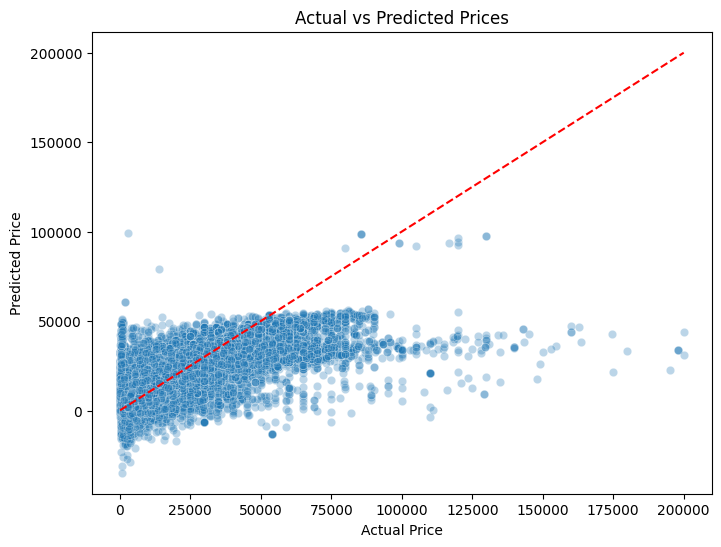

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


---
---

Heavy clustering at lower prices (0–40k)

Predictions are fairly reasonable in this range, but still spread out.

The cloud falls below the diagonal → the model consistently predicts too low for expensive cars.

---
---

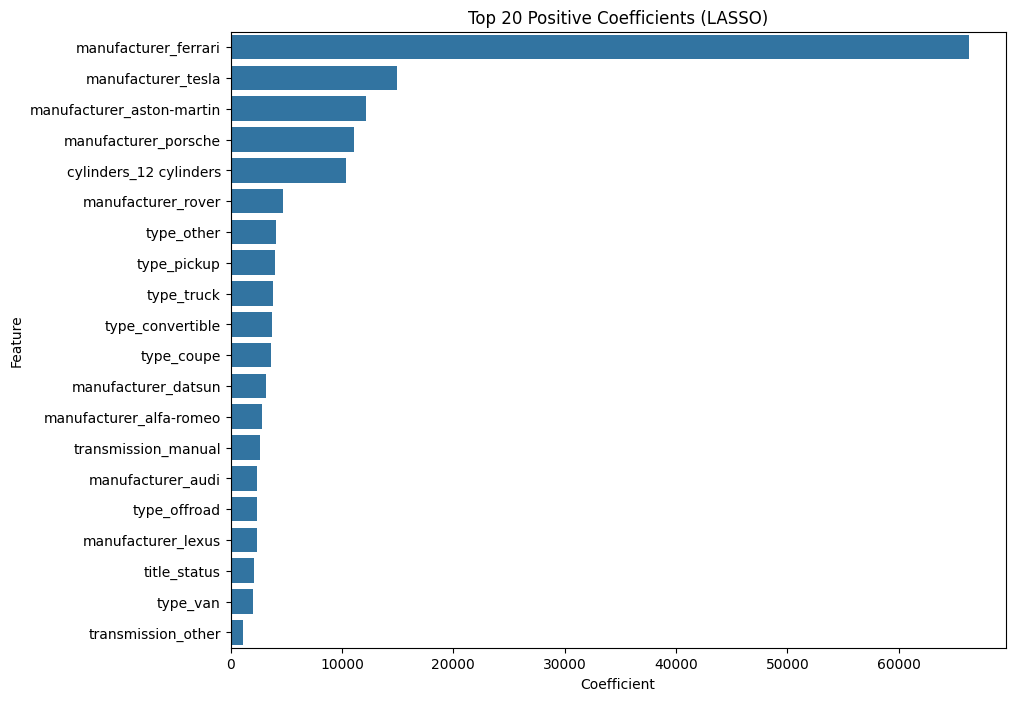

In [ ]:
coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_lasso.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x="Coefficient", y="Feature", data=coeffs.head(20))
plt.title("Top 20 Positive Coefficients (LASSO)")
plt.show()


---
---

#**I will try a different strategy**

###Log-transform target variable


We can see from the plots and data that the car prices are skewed. Most cars are cheap and few are very expensive.

I will use **Log** to ** compress the scale** . This will hopefully stabilize variance and makes regression handle extremes better.#

In [ ]:
y_log = np.log1p(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [ ]:
# Convert predictions back to dollar scale
y_test_pred_dollar = np.expm1(y_test_pred)   # inverse of log1p
y_test_actual_dollar = np.expm1(y_test)

mae_dollar = mean_absolute_error(y_test_actual_dollar, y_test_pred_dollar)
rmse_dollar = np.sqrt(mean_squared_error(y_test_actual_dollar, y_test_pred_dollar))

print("Test R^2:", lin_reg.score(X_test, y_test))
print("Test MAE:      $", round(mae_dollar,2))
print("Test RMSE:     $", round(rmse_dollar,2))

Test R^2: 0.44378497320512034
Test MAE:      $ 6447.59
Test RMSE:     $ 10414.08


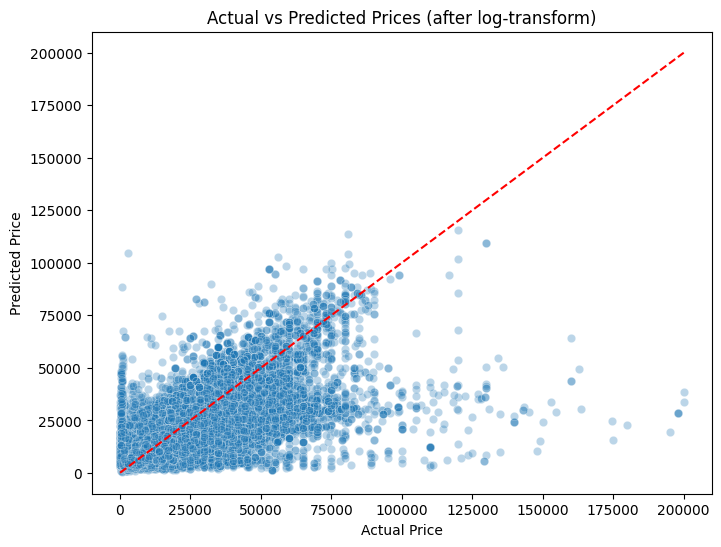

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_actual_dollar, y=y_test_pred_dollar, alpha=0.3)
plt.plot([y_test_actual_dollar.min(), y_test_actual_dollar.max()],
         [y_test_actual_dollar.min(), y_test_actual_dollar.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (after log-transform)")
plt.show()



---



---


Test R^2: 0.44378497320512034
Test MAE:      $ 6447.59
Test RMSE:     $ 10414.08.

Minimal improvement. R^2 is worse so only 44% can be explained overall

---
---


In [ ]:
#lets try non linear relationships
num_features = ['car_age', 'odometer', 'condition', 'title_status']

X_selected = X[num_features]

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_selected)

# feature names
poly_features = poly.get_feature_names_out(X_selected.columns)

X_poly_df = pd.DataFrame(X_poly, columns=poly_features)
X_poly_df.head()

,car_age,odometer,condition,title_status,car_age^2,car_age odometer,car_age condition,car_age title_status,odometer^2,odometer condition,odometer title_status,condition^2,condition title_status,title_status^2
0,-0.316706,-0.545284,2.0,4.0,0.100303,0.172695,-0.633413,-1.266826,0.297335,-1.090569,-2.181138,4.0,8.0,16.0
1,0.146852,-0.337651,2.0,4.0,0.021566,-0.049585,0.293705,0.587409,0.114008,-0.675301,-1.350603,4.0,8.0,16.0
2,-1.012045,-1.150162,2.0,4.0,1.024234,1.164016,-2.024089,-4.048178,1.322873,-2.300325,-4.600649,4.0,8.0,16.0
3,-0.664376,-0.807425,2.0,4.0,0.441395,0.536433,-1.328751,-2.657502,0.651935,-1.614849,-3.229699,4.0,8.0,16.0
4,-0.200817,0.548233,3.0,4.0,0.040327,-0.110094,-0.602450,-0.803267,0.300560,1.644700,2.192933,9.0,12.0,16.0


In [ ]:
# merge back with dataset and drop originals (so no dups)
X_final = pd.concat([X.drop(columns=num_features).reset_index(drop=True),
                     X_poly_df.reset_index(drop=True)], axis=1)


In [ ]:
y = np.log1p(vehicles['price'])   # log-transform target
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

Scale Features

Polynomial expansion often creates features on very different scales. Standardization is critical.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regularized Regression (Ridge first)

Start with Ridge to handle collinearity, then optionally LASSO for feature selection.

In [ ]:
alphas = np.logspace(-3, 3, 13)  # [0.001, 0.01, ..., 1000]
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train)

print("Best alpha:", ridge.alpha_)

Best alpha: 0.001


In [ ]:
y_test_pred = ridge.predict(X_test_scaled)

# Convert predictions back to dollar scale
y_test_pred_dollar = np.expm1(y_test_pred)   # inverse of log1p
y_test_actual_dollar = np.expm1(y_test)

mae_dollar = mean_absolute_error(y_test_actual_dollar, y_test_pred_dollar)
rmse_dollar = np.sqrt(mean_squared_error(y_test_actual_dollar, y_test_pred_dollar))


print("Test R^2:", ridge.score(X_test_scaled, y_test))
print("Test MAE:      $", round(mae_dollar,2))
print("Test RMSE:     $", round(rmse_dollar,2))


Test R^2: 0.4921680222127204
Test MAE:      $ 5947.31
Test RMSE:     $ 9868.96


In [ ]:
#which polynomial/interaction terms matter most.
coef_df = pd.DataFrame({
    "feature": X_final.columns,
    "coef": ridge.coef_
}).sort_values("coef", key=lambda x: x.abs(), ascending=False)

coef_df.head(20)

,feature,coef
86,car_age,-0.756940
90,car_age^2,0.388930
44,cylinders_4 cylinders,-0.311494
51,fuel_gas,-0.264942
46,cylinders_6 cylinders,-0.239777
49,cylinders_unknown,-0.220607
53,fuel_other,-0.171948
96,odometer title_status,-0.161727
47,cylinders_8 cylinders,-0.130277
93,car_age title_status,0.125332


--



---


Imporvement but not by much. Polynomial + interaction terms helped, but not enough to capture more than ~49% of variance.

---
---


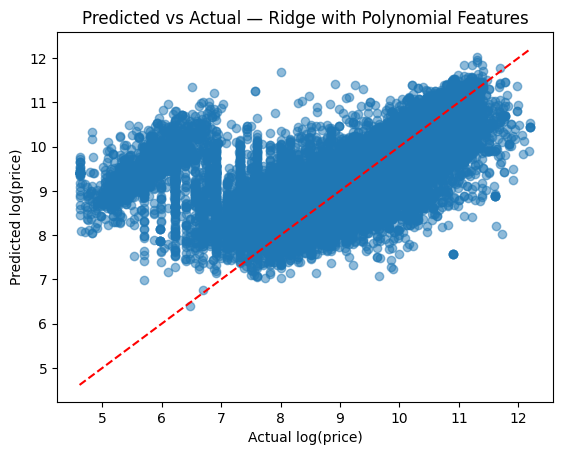

In [ ]:
y_pred = ridge.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # 45° line
plt.xlabel("Actual log(price)")
plt.ylabel("Predicted log(price)")
plt.title("Predicted vs Actual — Ridge with Polynomial Features")
plt.show()

---
---
At the low end (left side), predictions are too high compared to actuals.

At the high end (right side), predictions are too low.

sign that the model is underfitting extremes — even with polynomial terms.


---
---

---
---

Last try with Lasso

---
---

In [ ]:

y = np.log1p(vehicles['price'])
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

lasso_pipe = Pipeline([
    ("scale", StandardScaler()),
    ("lasso", LassoCV(
        alphas=np.logspace(-3, 1, 30),  cv=5, max_iter=5000, n_jobs=-1, random_state=42
    ))
])

lasso_pipe.fit(X_train, y_train)

lasso = lasso_pipe.named_steps["lasso"]

print("Best alpha:", lasso.alpha_)


Best alpha: 0.001


In [ ]:
y_test_pred = lasso_pipe.predict(X_test)

# Convert predictions back to dollar scale
y_test_pred_dollar = np.expm1(y_test_pred)   # inverse of log1p
y_test_actual_dollar = np.expm1(y_test)

mae_dollar = mean_absolute_error(y_test_actual_dollar, y_test_pred_dollar)
rmse_dollar = np.sqrt(mean_squared_error(y_test_actual_dollar, y_test_pred_dollar))


print("Test R^2:", lasso_pipe.score(X_test, y_test))
print("Test MAE:      $", round(mae_dollar,2))
print("Test RMSE:     $", round(rmse_dollar,2))


Test R^2: 0.4912195805665599
Test MAE:      $ 5949.25
Test RMSE:     $ 9878.06


In [ ]:

coefs = lasso.coef_
nonzero_idx = np.where(coefs != 0)[0]

coef_df = pd.DataFrame({
    "feature": X_final.columns[nonzero_idx],
    "coef": coefs[nonzero_idx]
}).sort_values("coef", key=lambda x: x.abs(), ascending=False)

print("Features kept:", coef_df.shape[0], "out of", len(X_final.columns))
coef_df.head(20)

Features kept: 96 out of 100


,feature,coef
85,car_age,-0.624538
87,car_age^2,0.382626
50,fuel_gas,-0.258419
52,fuel_other,-0.165456
43,cylinders_4 cylinders,-0.163783
92,odometer title_status,-0.116570
57,drive_fwd,-0.105079
82,paint_color_unknown,-0.102709
59,drive_unknown,-0.082352
51,fuel_hybrid,-0.081544


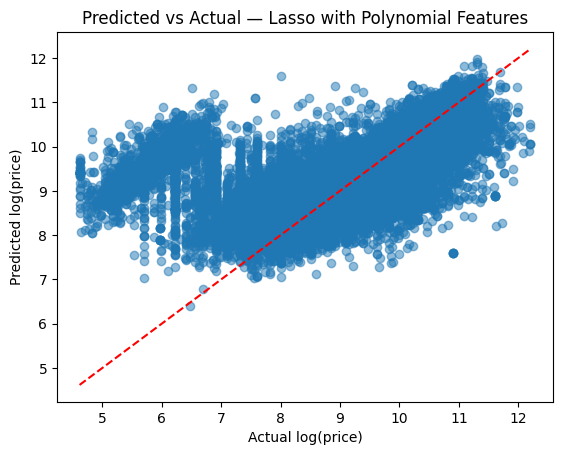

In [ ]:
y_pred = lasso_pipe.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # 45° line
plt.xlabel("Actual log(price)")
plt.ylabel("Predicted log(price)")
plt.title("Predicted vs Actual — Lasso with Polynomial Features")
plt.show()

---
---
No improvement.

SFS - SequetialFeatureSelection will not improve anything as Lasso has already done feature selection by shrinking some coefficients to zero. Running SFS on top of Lasso means SFS is only exploring among the stronger features.

---
---

---
---
Lets combine ridge and lasso to and SFS to see if it improves the model

**Execution did not complete, needs too much resources**

---
---

#Anoher approach Split into 2 models - Regular cars and Luxury cars

---
---

In [ ]:
luxury_cars_list = [
    "manufacturer_ferrari",
    "manufacturer_porsche",
    "manufacturer_tesla",
    "manufacturer_aston-martin",
    "manufacturer_maserati",
    "manufacturer_jaguar",
    "manufacturer_land rover",
    "manufacturer_alfa-romeo",
    "manufacturer_bentley",
    "manufacturer_rolls-royce",
    "manufacturer_lamborghini",
    "manufacturer_bugatti",
    "manufacturer_lotus",
    "manufacturer_harley-davidson"
]

# Keep only the dummy columns that actually exist in vehicles_original
luxury_dummies = [col for col in luxury_cars_list if col in vehicles_original.columns]

# Create mask using only existing columns
is_luxury = vehicles_original[luxury_dummies].any(axis=1)

luxury_cars = vehicles_original[is_luxury].copy()
regular_cars = vehicles_original[~is_luxury].copy()

print("Luxury cars:", luxury_cars.shape)
print("Regular cars:", regular_cars.shape)


Luxury cars: (5085, 91)
Regular cars: (379793, 91)


In [ ]:
def prepare_xy(data):
    X = data.drop(columns=["price"])
    y = np.log1p(data["price"])   # log-transform target
    return X, y

X_lux, y_lux = prepare_xy(luxury_cars)
X_reg, y_reg = prepare_xy(regular_cars)

X_train_lux, X_test_lux, y_train_lux, y_test_lux = train_test_split(
    X_lux, y_lux, test_size=0.2, random_state=42
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

def evaluate_lr(name, X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_log = model.predict(X_test)
    y_pred_dollar = np.expm1(y_pred_log)
    y_test_dollar = np.expm1(y_test)

    return {
        "Model": name,
        "Test R²": model.score(X_test, y_test),
        "MAE ($)": mean_absolute_error(y_test_dollar, y_pred_dollar),
        "RMSE ($)": np.sqrt(mean_squared_error(y_test_dollar, y_pred_dollar))
    }

#Run models
results = []
results.append(evaluate_lr("Linear Regression - Luxury Cars", X_train_lux, X_test_lux, y_train_lux, y_test_lux))
results.append(evaluate_lr("Linear Regression - Regular Cars", X_train_reg, X_test_reg, y_train_reg, y_test_reg))

results_df = pd.DataFrame(results)
print(results_df)

                              Model   Test R²      MAE ($)      RMSE ($)
0   Linear Regression - Luxury Cars  0.425803  8983.381978  16381.599799
1  Linear Regression - Regular Cars  0.444609  6384.412946  10275.453347


---
---
Splitting the dataset into luxury and regular did not help
---
---

In [ ]:
vehicles_original.head()


,price,condition,odometer,title_status,car_age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
27,33590,2,-0.545284,4,-0.316706,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
28,22590,2,-0.337651,4,0.146852,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,39590,2,-1.150162,4,-1.012045,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
30,30990,2,-0.807425,4,-0.664376,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
31,15000,3,0.548233,4,-0.200817,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
vehicles_original.shape

(384878, 91)

In [ ]:
#how many rows with price less than $100 ?
vehicles_original[vehicles_original['price'] < 100].shape

(0, 91)

In [ ]:
#how many rows with odometer reading less than 100 miles ?
vehicles_original[vehicles_original['odometer'] < 100].shape

(384878, 91)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

---
---
## **Model Execution Observations and Pivots (tried many times, used many strategies) **

### Notes: Resource is a huge issue. Many of the Model executions did not complete. Moved to Google Colab and was able to complete some executions. Had to reduce parameters Cross Validation and Max iterations in LASSO to get the execution to complete. Could not club together ridge and lasso in a pipeline as it never completed.

### Strategy I
   Did **baseline LinearRegression** - Training and Test R^2 where close .555 and .558 which meant the model was stable. This also meant the model was only able to explain half the variations in the used car prices.     Test MAE: $ 6480.52, Test RMSE: $ 10011.37. So the predictions were off by quite a bit (comaprison table presented later ).

   After execution of **Ridge** there was not much change. Alpha=1

   After execution of **LASSO** very minimal change Test R^2: 0.555, Test MAE: $ 6479.7, Test RMSE: $ 10012.63

   
   I was expecting residuals (errors) to be scattered randomly around 0. What I got was triangle/funnel shape. The residual spread gets wider as predicted price increases. SO errors aren’t constant across price levels. This could mean the model predicts cheaper cars more consistently, but does not do well with expensive ones.

   
   the plot shows heavy clustering at lower prices (0–40k). Looks like the predictions are fairly reasonable in this range, but still spread out. The cloud falls below the diagonal and clustoring below 0 which many mean that the model predicts low prices for more expensive cars.

   

### Strategy II
   Log-transform target variable Price. Since there is a wide spread, prices are skewed, most are cheap cars but few are very expensive. Log will compress the scale. This will hopefully stabilize variance and makes regression handle extremes better.

!
Test R^2: 0.443, Test MAE: $ 6447.59, Test RMSE: $ 10414.08. So there was minimal improvement, Model could explain only 44% of the variations, MAE and RMSE came down a bit.

### Strategy III
Explore non linear relationships for 'car_age', 'odometer', 'condition', 'title_status', PolynomialFeatures with degree=2. Polynomial expansion often creates features on very different scales. So standardization is important. Apply StandardScaler and then do RidgeCV and LassoCV to see if there is any improvements


Test R^2: 0.491, Test MAE: $ 5949.25, Test RMSE: $ 9878.06



### Strategy IV
Split the dataset into Luxury and Regular cars and try a two model strategy.
                                     
Linear Regression - Luxury Cars  R^2 =0.425, MAE $8983.38, RMSE = $16381.599799

Linear Regression - Regular Cars  R^2 =0.44, MAE $6384.412946, RMSE = $10275.45




---
---

/tmp/ipython-input-2373011007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coef", y="feature", data=top_features,


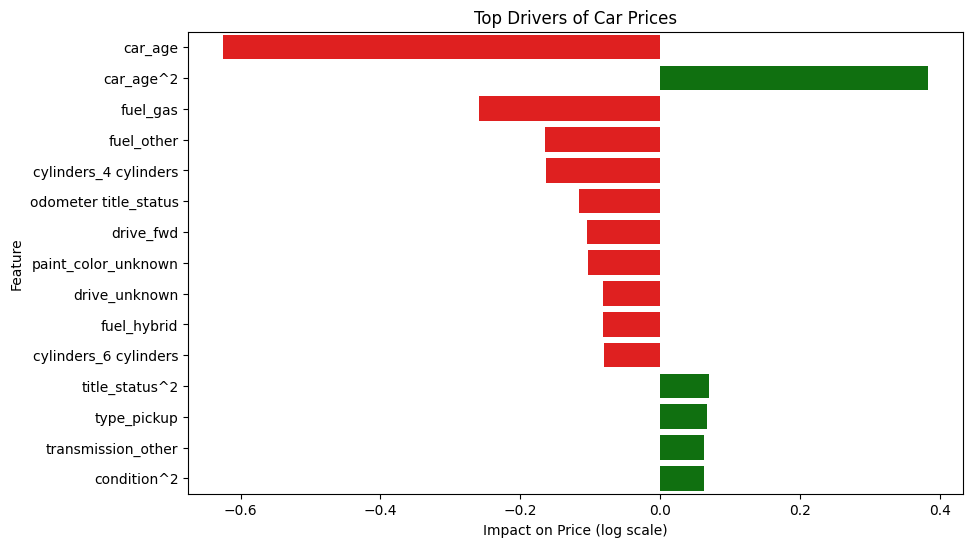

In [ ]:
top_features = coef_df.sort_values("coef", key=lambda x: x.abs(), ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x="coef", y="feature", data=top_features,
            palette=["green" if c>0 else "red" for c in top_features["coef"]])
plt.title("Top Drivers of Car Prices")
plt.xlabel("Impact on Price (log scale)")
plt.ylabel("Feature")
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

---
---
## Used Car Prices: Data-Driven Insights for Dealers

### Executive Summary

Using regression analysis on a large dataset of used car listings, I examined what drives vehicle prices in today’s market. My models achieved predictive performance 0.49–0.56, meaning they explain about half of the variation in prices. While not perfect, these results highlight key factors that consistently impact resale value.

The findings confirm that: car age, mileage, condition, brand, and title status are the most important price drivers.

![Top Drivers of Price](images/top_drivers.png)

### Age of the car is the top driver of price
Cars under five years will sell at a premium.

### Odometer is a prime driver of price
Low milage will sell at a premium. Higher odometer readings reduce price consistently.

### Condition & Title Status
Shows as positive drivers of price. A clean title and a car in good condition will sell at a higher price.

### Fuel type

Hybrid seems to be more preferred and a driver of price.
---
---